In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sensor and ground truth data 
gyro  = pd.read_csv("archive/RawGyro.csv")
accel = pd.read_csv("archive/RawAccel.csv")
baro  = pd.read_csv("archive/BarometricPressure.csv")
gps   = pd.read_csv("archive/OnboardGPS.csv")
truth = pd.read_csv("archive/OnboardPose.csv")

# data cleaning
gps = gps.drop(['Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17'], axis=1)
# these columns were either empty or were all NaN's

# helper function for generating line plots

def line_plot(ts, ms, label_y):
    """
    ts: numpy array or pandas series reps time stamps on the horizonal axis
    ms: measurements in numpy array or pandas series reps velocity or accelaration
    
    """
    plt.figure(figsize=(10, 5))
    plt.plot(ts, ms, color='navy', linewidth=1.5)
    plt.axhline(np.mean(ms), color='gray', linestyle='--', linewidth=0.8)  # Zero-centered reference line
    plt.xlabel("Time (s)")
    plt.ylabel(f"{label_y}")
    plt.title(f"{label_y} vs. Time")
    plt.tight_layout()
    plt.show()

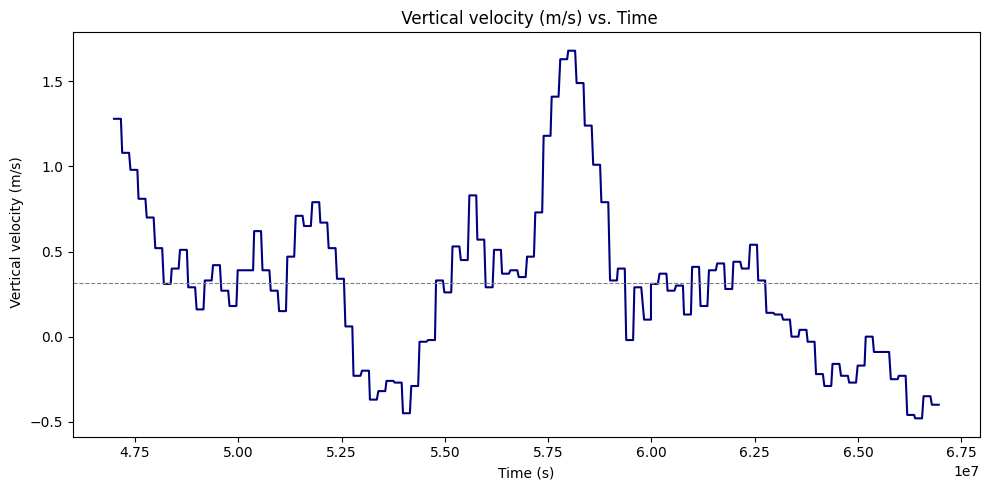

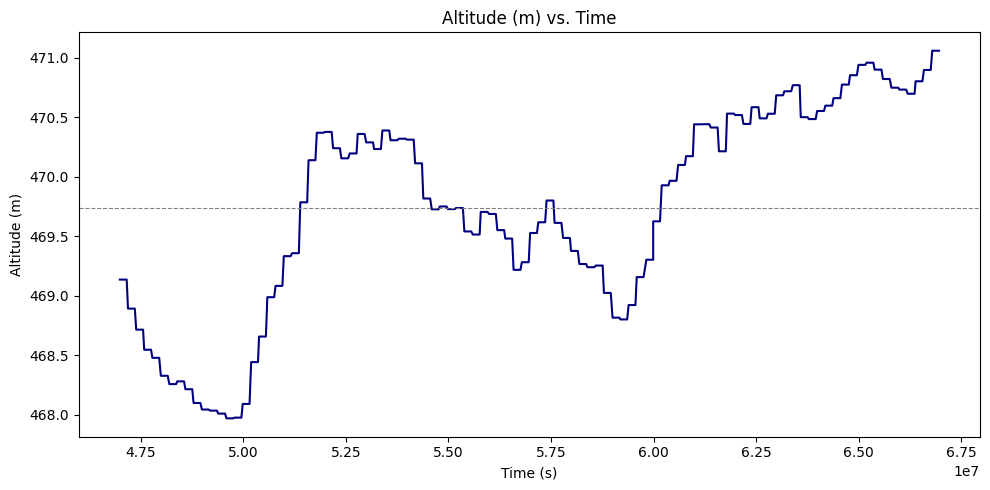

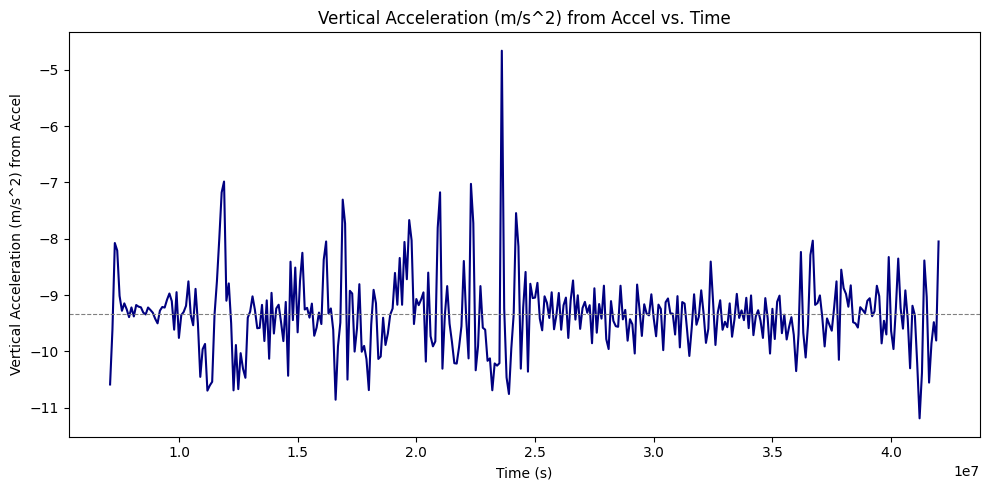

In [3]:
"""
The GPS velocities are reported in END (East-North-Down) instead of ENU (East-North-Up) coordinates. Meaning,
a positive velocity would indicate that the MAV is heading downward. In the graph, at constant positive 
velocity we'd expect the altitude to decrease. However, in the contrary, the altitude generally increases. 
As a result, we conclude that the GPS velocities are reported in the ENU system where east, north, and up
are respectively considered the positive axes.
"""

# dist gps vertical velocities

line_plot(gps['Timpstemp'][1200:1800], gps[' vel_d_m_s'][1200:1800], " Vertical velocity (m/s)")
line_plot(gps['Timpstemp'][1200:1800], gps[' alt'][1200:1800], "Altitude (m)")
line_plot(accel['Timpstemp'][:350], accel[' z'][:350], "Vertical Acceleration (m/s^2) from Accel")

In [2]:
"""
The acc seems to be held at -10 m/s^2 which is to keep it hovering at constant altitude. By convention,
the accelerometer reports resultant force per mass. So, a 0 would indicate free fall, +9.8 indicates thrust 
motioned downwards at 9.8, -9.8 indicates thrust pushing against free fall. 

places where this could come up:
1) propagation: we make self.g = +9.8
"""

'\nThe acc seems to be held at -10 m/s^2 which is to keep it hovering at constant altitude. By convention,\nthe accelerometer reports resultant force per mass. So, a 0 would indicate free fall, +9.8 indicates thrust \nmotioned downwards at 9.8, -9.8 indicates thrust pushing against free fall. \n\nplaces where this could come up:\n1) propagation: we make self.g = +9.8\n'